In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
len(x_train)

60000

In [22]:
len(x_test)

10000

In [23]:
x_train[0].shape

(28, 28)

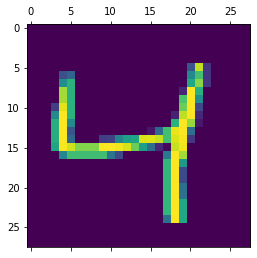

In [24]:
plt.matshow(x_train[2])

In [25]:
y_train[2]

4

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [28]:
x_test_flattened.shape

(10000, 784)

In [29]:
x_train_flattened.shape

(60000, 784)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4678 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2663 - accuracy: 0.9260


In [31]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 855us/step - loss: 0.2705 - accuracy: 0.9249


[0.2705182135105133, 0.9248999953269958]

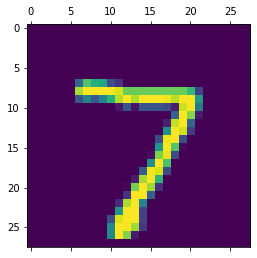

In [35]:
plt.matshow(x_test[0])

In [36]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 790us/step


In [37]:
y_predicted[0]

array([3.7714999e-02, 3.7840726e-07, 6.6081576e-02, 9.5961851e-01,
       2.6647192e-03, 1.1697199e-01, 1.8601812e-06, 9.9986672e-01,
       1.3010339e-01, 6.7328644e-01], dtype=float32)

In [40]:
np.argmax(y_predicted[0])

7

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [43]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  11,    9,  921,   14,    6,    3,   12,   12,   41,    3],
       [   4,    0,   18,  913,    0,   30,    2,   13,   24,    6],
       [   3,    1,    5,    2,  914,    0,    8,    5,   11,   33],
       [  11,    3,    4,   27,    8,  781,   16,    7,   29,    6],
       [  15,    3,    8,    1,    7,   11,  910,    2,    1,    0],
       [   2,    5,   21,    4,    4,    0,    0,  968,    2,   22],
       [  12,    7,    6,   17,    9,   31,    9,   15,  864,    4],
       [  12,    5,    1,   10,   26,    7,    0,   40,    7,  901]])>

Text(69.0, 0.5, 'Truth')

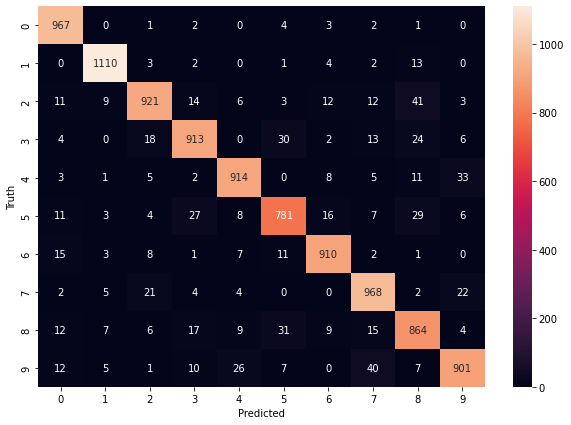

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# IF WE ADD A HIDDEN LAYER

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1247 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0878 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0672 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9831


In [46]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9737


[0.0831252932548523, 0.9736999869346619]

Text(69.0, 0.5, 'Truth')

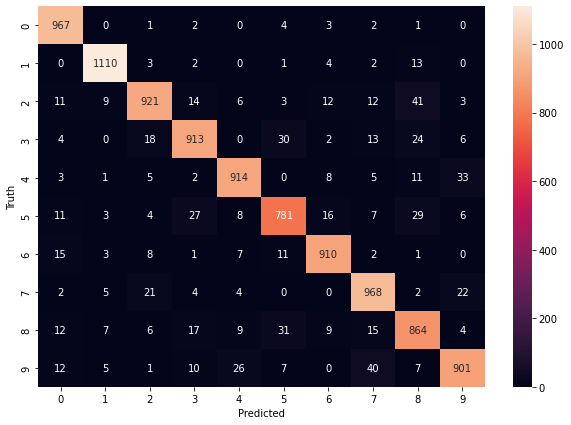

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

IF U DONT WANNA USE FLATTEN

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2678 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1220 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0856 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9844
